<a href="https://colab.research.google.com/github/hmarathe420/Credit_Card_Default_Prediction/blob/main/Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name**            - Harshal Marathe  


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Dataset Loading

In [2]:
# Mounting the google drive for accessing the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Loading the Dataset
df = pd.read_csv("/content/drive/MyDrive/Credit Card Default Prediction/default of credit card clients.xls - Data.csv", header= 1)

In [4]:
# Removing the index if there is
df.reset_index(drop = True , inplace = True)

### Dataset First View

In [5]:
# Dataset First Look
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f'The dataset has {df.shape[1]} columns & {df.shape[0]} Rows.')

The dataset has 25 columns & 30000 Rows.


### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Counts

duplicate_rows = df.duplicated().sum()
print(f'Duplicate_rows : {duplicate_rows}')

duplicate_specific = df.duplicated(subset = ['ID','LIMIT_BAL' ,'SEX','EDUCATION','MARRIAGE']).sum()
print(f"duplicate_over_specific_columns : {duplicate_specific}")

Duplicate_rows : 0
duplicate_over_specific_columns : 0


Above i have tried to calculate the duplicate rows of the whole dataset and over the specific columns but from the above i can conclude that there is no duplicate rows present in this dataset.

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

<Axes: >

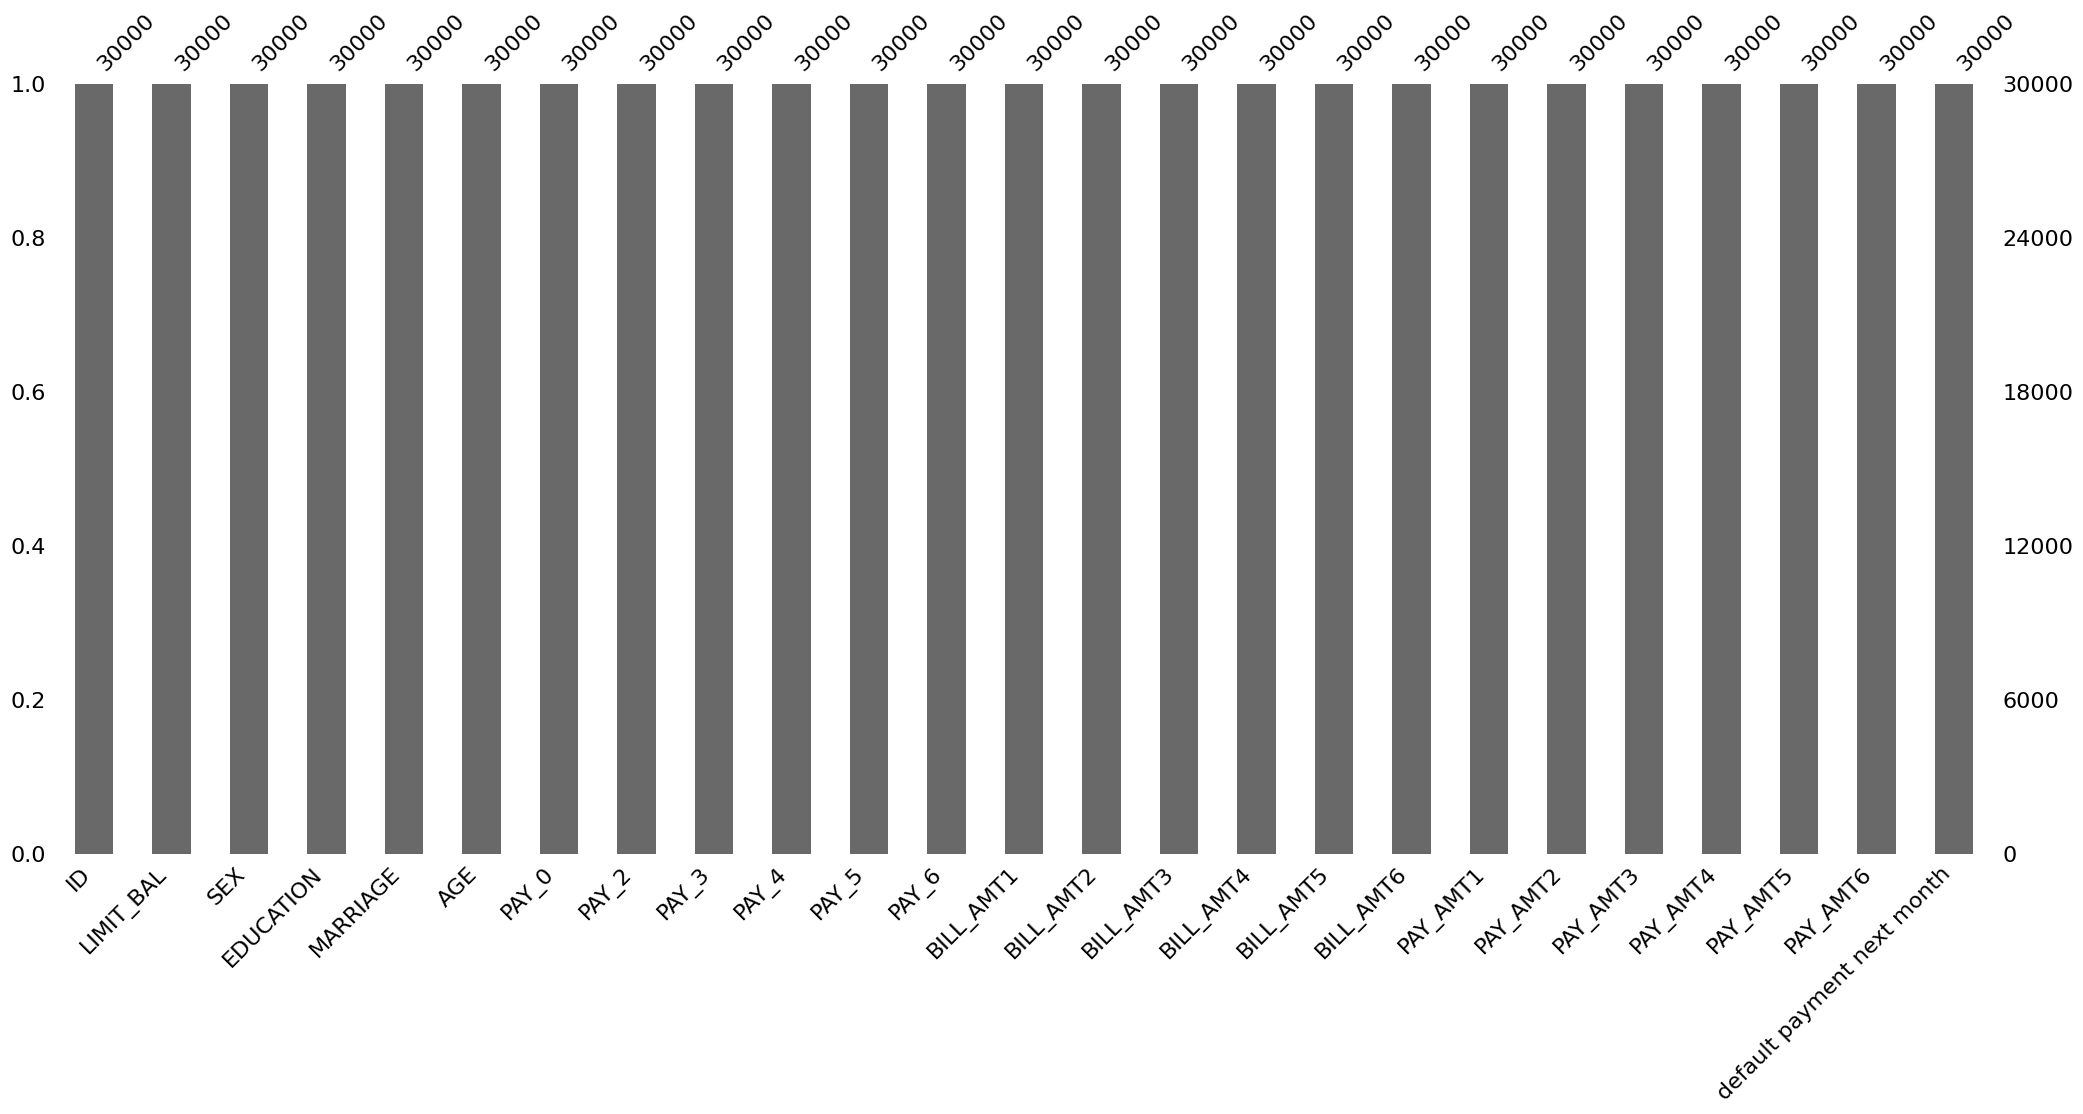

In [10]:
# Visualizing the missing values
msno.bar(df)

### What did you know about your dataset?

I knew that there are 25 columns and 3000 Records are present in this dataset. and the dataset does not contain duplicate rows. and there is no any missing value in dataset. This kind of information i got to know from the above dataset.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [12]:
# Dataset Describe
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Variables Description

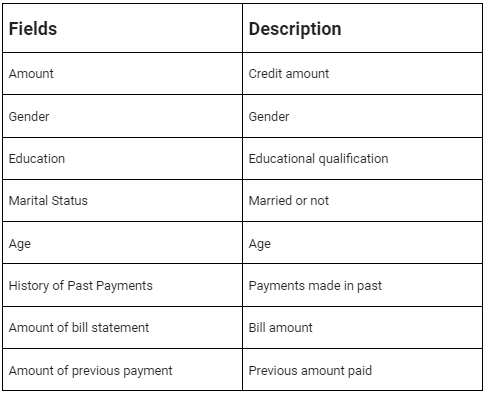




ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years



PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight - months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Deleting the ID column from the dataset
del df['ID']

In [15]:
# Renaming payment column with month tag
df.rename(columns = {'PAY_0':'pay_sept','PAY_2':'pay_agu','PAY_3':'pay_july','PAY_4':'pay_jun','PAY_5':'pay_may','PAY_6': 'pay_apr'}, inplace =True)

In [16]:
# Renaming Bill amount column with month tag
df.rename(columns={'BILL_AMT1':'SEPT_BILL_AMT','BILL_AMT2':'AUG_BILL_AMT','BILL_AMT3':'JULY_BILL_AMT','BILL_AMT4':'JUN_BILL_AMT','BILL_AMT5':'MAY_BILL_AMT','BILL_AMT6':'APR_BILL_AMT'} , inplace = True)

In [17]:
# Renaming previous payment column with month tag
df.rename(columns = {'PAY_AMT1':'SEPT_PAY_AMT','PAY_AMT2':'AGU_PAY_AMT','PAY_AMT3':'JUL_PAY_AMT','PAY_AMT4':'JUN_PAY_AMT','PAY_AMT5':'APR_PAY_AMT','PAY_AMT6':'MAY_PAY_AMT'}, inplace = True)

In [18]:
# renaming the default payment column with _
df.rename(columns ={'default payment next month':'default_payment_next_month'}, inplace = True)

In [19]:
# checking whether the column name has been changed or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   pay_sept                    30000 non-null  int64
 6   pay_agu                     30000 non-null  int64
 7   pay_july                    30000 non-null  int64
 8   pay_jun                     30000 non-null  int64
 9   pay_may                     30000 non-null  int64
 10  pay_apr                     30000 non-null  int64
 11  SEPT_BILL_AMT               30000 non-null  int64
 12  AUG_BILL_AMT                30000 non-null  int64
 13  JULY_BILL_AMT               30000 non-null  int64
 14  JUN_BI

### What all manipulations have you done and insights you found?

Above i have deleted the index column. and rename the repayment_status column, bill amount column, previous month bill amount column and default payment column.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Exploratory Data Analysis

#### Chart - 1

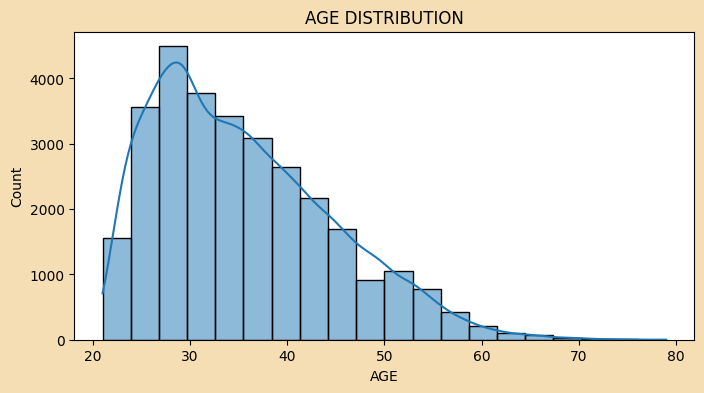

In [20]:
# Age Distribution
plt.figure(figsize= (8,4), facecolor = 'wheat')
sns.histplot(df['AGE'],bins = 20, kde = True)
plt.title('AGE DISTRIBUTION')
plt.show()

##### 1. Why did you pick the specific chart?

I wanted to see whether the data is normalize or not and also wanted to see the age distribution. That's why i pick the above histplot.

##### 2. What is/are the insight(s) found from the chart?

From the above histplot i found that the data is not normalize. and the people having 30 age has high count in dataset.

#### Chart - 2

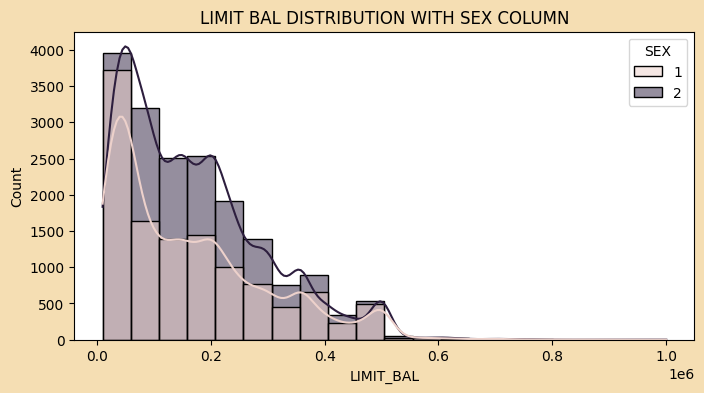

In [21]:
# LIMIT BAL DISTRIBUTION WITH SEX COLUMN
plt.figure(figsize = (8,4), facecolor = 'wheat')
plt.title('LIMIT BAL DISTRIBUTION WITH SEX COLUMN')
sns.histplot(data = df, x= 'LIMIT_BAL',bins = 20, hue = 'SEX', kde = True)
plt.plot()
plt.show()

##### 1. Why did you pick the specific chart?

I wanted to see the LIMIT BAL with sex column thats why i use the above chart with kde.

##### 2. What is/are the insight(s) found from the chart?

From the above graph i found that the female has high count as compare to male.
and the female has high LIMIT BAL as compare to male.
and from the above graph i can conclude that as LIMIT BALANCE increase the count of peoples are decreasing it means the less peoples get High LIMIT BALANCE.

#### Chart - 3

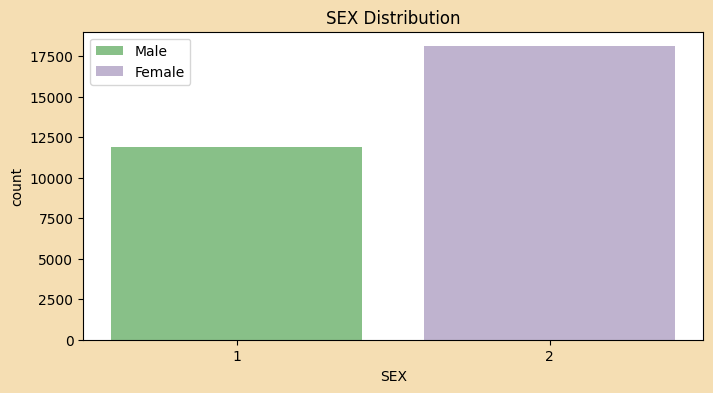

In [22]:
# SEX COLUMN distribution
plt.figure(figsize = (8,4), facecolor = 'wheat')
plt.title('SEX Distribution')
sns.countplot(data = df, x = 'SEX', palette='Accent',label = ['Male','Female'])
plt.legend()
plt.plot()
plt.show()

##### 1. Why did you pick the specific chart?

I wanted to check how many males and females present in the dataset that's why i pick the countplot for visualizing the sex column.

##### 2. What is/are the insight(s) found from the chart?

From the count plot i found the insights. The insights are the male count is less than females and female count is higher than males.

#### Chart - 4

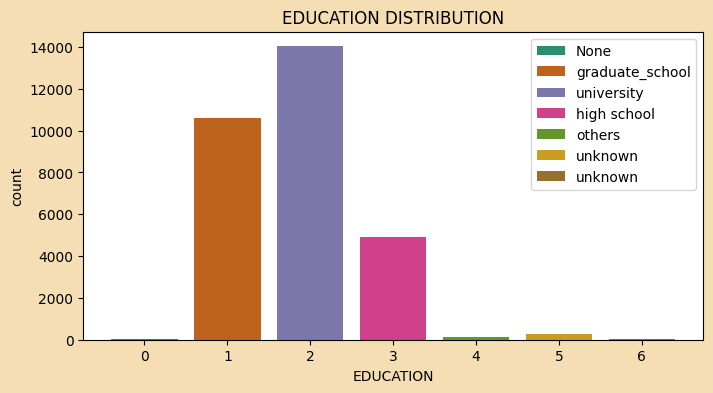

In [23]:
# Education Distribution
plt.figure(figsize =(8,4), facecolor = 'wheat')
plt.title('EDUCATION DISTRIBUTION')
sns.countplot(data = df, x = 'EDUCATION', palette='Dark2', label =['None','graduate_school','university','high school','others','unknown','unknown'])
plt.legend()
plt.plot()
plt.show()

##### 1. Why did you pick the specific chart?

I wanted to distribute the education column that's why i pick above chart.

##### 2. What is/are the insight(s) found from the chart?

From the above count plot i got the folowing insights.



*   The Education 'University' has high count as compare to other education type.
*   graduate school has count higher than the high school


*   The high school has high count than other and none education except graduate and university.
*   The none, other and unknown has very low count.






#### Chart - 5

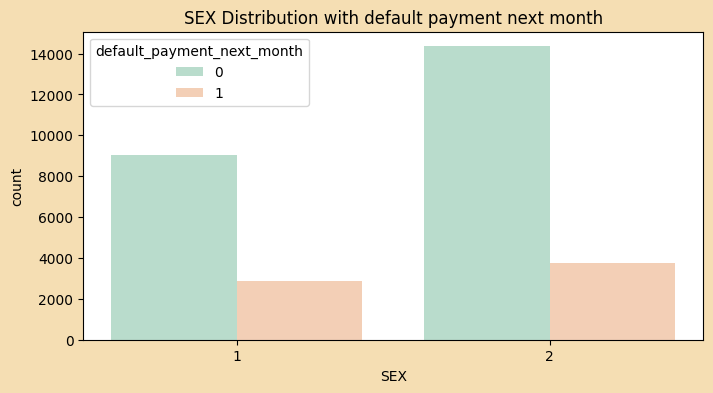

In [24]:
# sex distribution with default payment next month

plt.figure(figsize = (8,4), facecolor = 'wheat')
plt.title('SEX Distribution with default payment next month')
sns.countplot(data = df , x = 'SEX', hue = 'default_payment_next_month', palette='Pastel2')
plt.plot()
plt.show()

##### 1. Why did you pick the specific chart?

I wanted to distribute the sex column with default payment next month column that's why i pick above column.

##### 2. What is/are the insight(s) found from the chart?

The female has high count with default than males this kind of insight i got from the above countplot.

#### Chart - 6

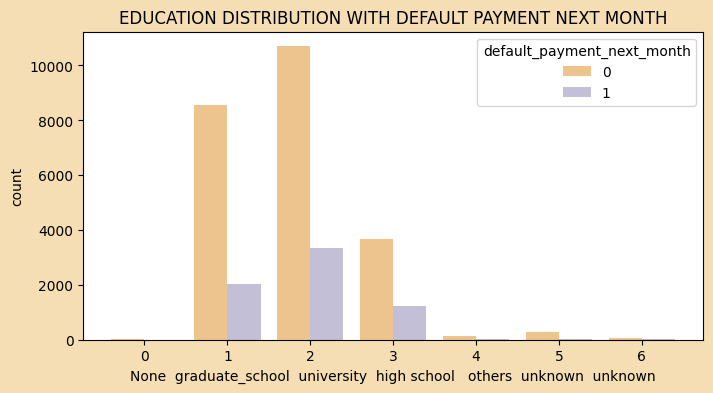

In [25]:
# Education Distribution with default payment next month
plt.figure(figsize = (8,4), facecolor = 'wheat')
plt.title('EDUCATION DISTRIBUTION WITH DEFAULT PAYMENT NEXT MONTH')
sns.countplot(data = df, x= 'EDUCATION', hue = 'default_payment_next_month', palette= 'PuOr')
plt.xlabel("None  graduate_school  university  high school   others  unknown  unknown")
plt.plot()
plt.show()

##### 1. Why did you pick the specific chart?

I wanted to distribute the education column with default payment next month column that's why pick above chart.

##### 2. What is/are the insight(s) found from the chart?

From the above count plot i found the following insights.





*   The university education type has high count and high defaults as compare to othe education type.
*   From the above graph we can conclude that the graduate_school, university and high school education type has high count and high defaults as compare to other education type.

*   The education type None, other and unknows has low count and low defaults.





#### Chart - 7

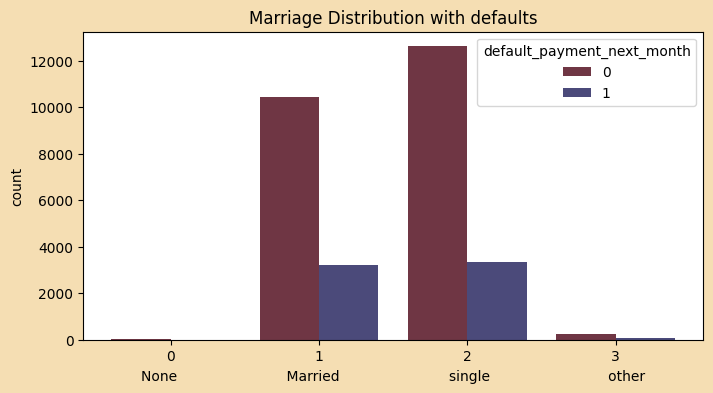

In [26]:
# Marriage distribution with defaults
plt.figure(figsize = (8,4), facecolor = 'wheat')
plt.title('Marriage Distribution with defaults')
sns.countplot(data = df, x = 'MARRIAGE', hue = 'default_payment_next_month', palette = 'icefire_r')
plt.xlabel('None                         Married                         single                           other')
plt.plot()
plt.show()

##### 1. Why did you pick the specific chart?

I wanted to distribute the marriage column with defalut column that's why i pick the above plot.

##### 2. What is/are the insight(s) found from the chart?

From the above plot i found the following insights:



*   The single has high count and high defaults as compare to others
*   The marriage also has high count than others except single.

*   from the above plot we can conclude that the marriage and single has almost same number of defaults.
*   The none and other has verry less count and defaults.








#### Chart - 8

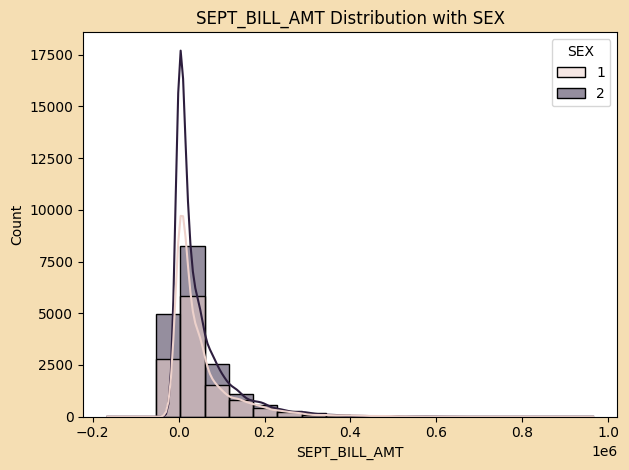

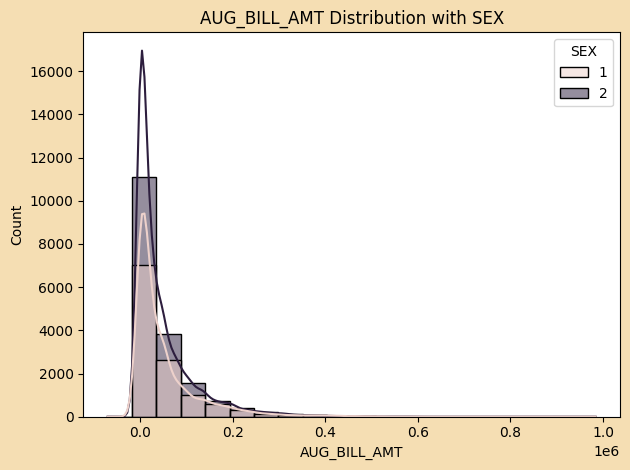

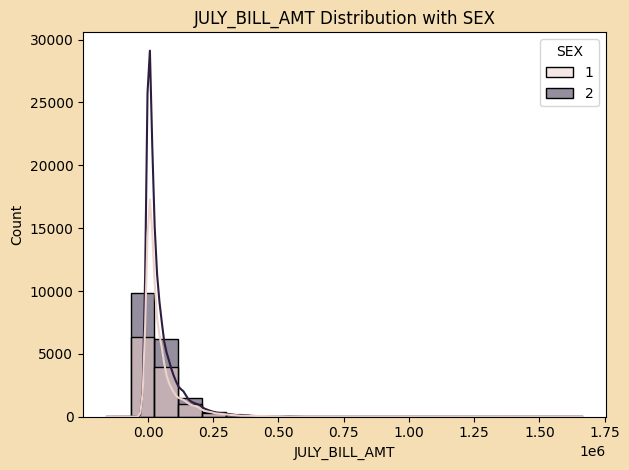

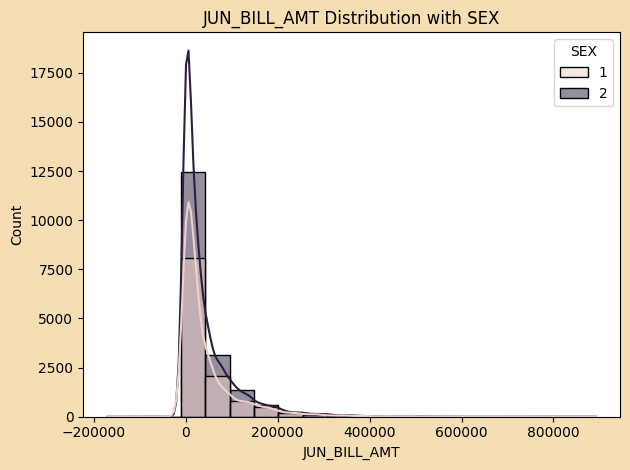

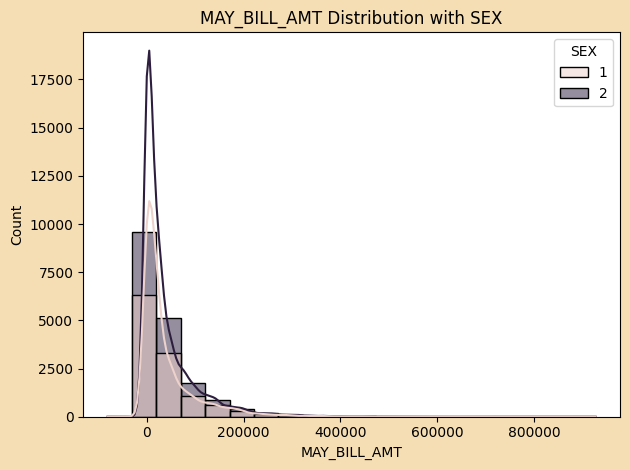

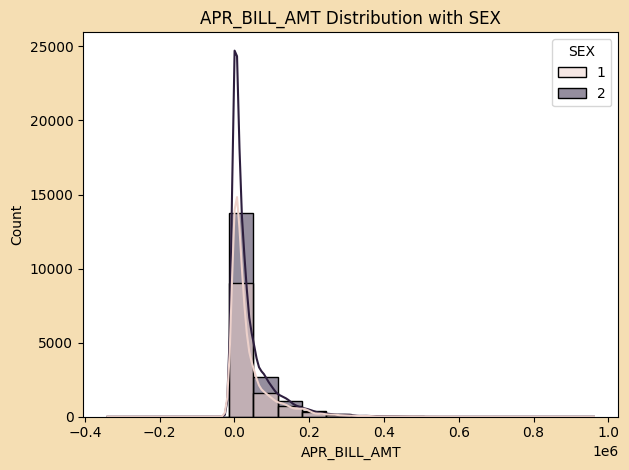

In [106]:
# ploting histplot for each month bill amount distribution with sex column.

pay_amt_list = ['SEPT_PAY_AMT', 'AGU_PAY_AMT'	, 'JUL_PAY_AMT',	'JUN_PAY_AMT',	'APR_PAY_AMT',	'MAY_PAY_AMT']
pay_bill_list = ['SEPT_BILL_AMT','AUG_BILL_AMT','JULY_BILL_AMT','JUN_BILL_AMT',	'MAY_BILL_AMT',	'APR_BILL_AMT']


for name in pay_bill_list:
  plt.rcParams['figure.autolayout'] = True
  plt.figure(facecolor = 'wheat')
  sns.histplot(data = df, x = name, bins = 20, kde = True, hue = 'SEX')
  plt.title(f'{name} Distribution with SEX')
  plt.plot()
  plt.show()

##### 1. Why did you pick the specific chart?

I wanted to plot the each month bill distribution with sex column that's why pick the histplot.

##### 2. What is/are the insight(s) found from the chart?

From the above histplot i can say that in the every month the count of female is higher than males. and i can also conclude that from the above graph. As bill amount increase the count of male and female decrease. It means we can say that less number of peopes has high bill amount. This kind of insights i got from the above graph.



#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***